In [81]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# File to Load - Read the City and Ride Data
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_and_ride_data = pd.merge(ride_data, city_data, on="city", how="left")


# Display the data table for preview
city_and_ride_data.head()


city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

# Bubble Plot of Ride Sharing Data

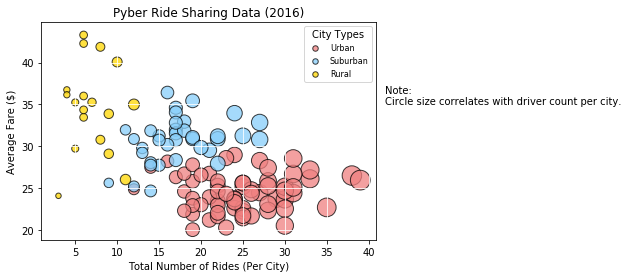

In [83]:
# Obtain the x and y coordinates for each of the three city types
Urban = city_and_ride_data[(city_and_ride_data.type == "Urban")]
Suburban = city_and_ride_data[(city_and_ride_data.type == "Suburban")]
Rural = city_and_ride_data[(city_and_ride_data.type == "Rural")]


Urban_rides_per_city = Urban.groupby([city_and_ride_data.city]).count()["ride_id"]
Urban_average_fare = Urban.groupby([city_and_ride_data.city]).mean()["fare"]

Suburban_rides_per_city = Suburban.groupby([city_and_ride_data.city]).count()["ride_id"]
Suburban_average_fare = Suburban.groupby([city_and_ride_data.city]).mean()["fare"]

Rural_rides_per_city = Rural.groupby([city_and_ride_data.city]).count()["ride_id"]
Rural_average_fare = Rural.groupby([city_and_ride_data.city]).mean()["fare"]


# Build the scatter plots for each city types
plt.scatter(Urban_rides_per_city, Urban_average_fare, label = "Urban", s=Urban_rides_per_city*10, marker="o", c=["lightcoral"], edgecolors="black", alpha = 0.75)
plt.scatter(Suburban_rides_per_city, Suburban_average_fare, label = "Suburban",s=Suburban_rides_per_city*10, marker="o", c=["lightskyblue"], edgecolors="black", alpha = 0.75)
plt.scatter(Rural_rides_per_city, Rural_average_fare, label = "Rural", s=Rural_rides_per_city*10, marker="o", c=["gold"], edgecolors="black", alpha = 0.75)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend

legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
           

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
plt.grid(c="white")  

# Save Figure
plt.savefig("../Images/Ride Sharing.png", bbox_inches="tight")


# Show Figure
plt.show()






## Total Fares by City Type

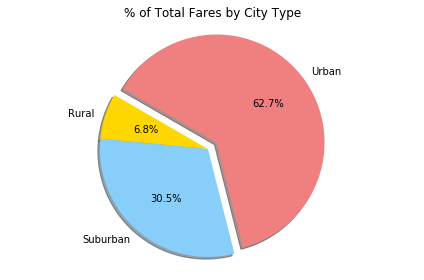

In [84]:
# Calculate Type Percents
Total_rides_per_city_Fare = city_and_ride_data.groupby(["type"])[["fare"]].sum()

# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
        
plt.pie(Total_rides_per_city_Fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")           

# Format plot
plt.title("% of Total Fares by City Type")
plt.axis("equal")


# Save Figure
plt.tight_layout()
plt.savefig("../Images/total_fares_by_city_type.png")


plt.show()


## Total Rides by City Type

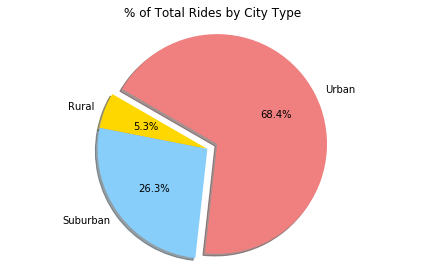

In [85]:
# Calculate Ride Percents
Total_Rides_by_City_Type = city_and_ride_data.groupby(["type"])[["ride_id"]].count()


# Build Pie Chart                
plt.pie(Total_Rides_by_City_Type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", pctdistance=.6,shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
explode=[0,0, 0.1] 
labels=["Rural","Suburban","Urban"] 
colors=["gold","lightskyblue", "lightcoral"] 
autopct= '%1.1f%%',

# Create a title, x label, and y label for plot
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.tight_layout()
plt.savefig("../Images/total_ride_by_type.png")


# Show Figure
plt.show()


## Total Drivers by City Type

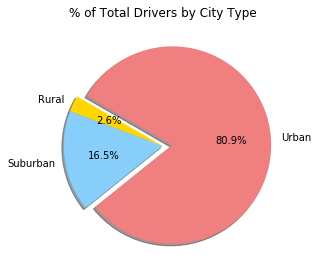

In [86]:
# Calculate Driver Percents
Total_Drivers_by_City_Type = city_data.groupby(["type"])[["driver_count"]].sum()

# Build Pie Charts
explode=[0,0,.1]
labels=["Rural","Suburban","Urban"]
colors=["gold","lightskyblue", "lightcoral"]
plt.pie(Total_Drivers_by_City_Type, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", pctdistance=.6,  shadow=True, startangle=150) 


plt.title("% of Total Drivers by City Type")


# Save Figure
plt.tight_layout()
plt.savefig("../Images/total_drivers_by_city_type.png")

# Show Figure
plt.show()

We can notice that even Pyber being present in all the areas (urban, suburban and rural) the urban area
shows a much better performance than in the suburban and rural areas. The average fare, number of
rides and drivers available will vary by each environment.


The number of drivers is drastically higher in city areas classified as “urban”, followed by “suburban” and
having the least amount of drivers in rural areas. A comparison of population or geographic size versus
number of drivers would be helpful to figure out if the lower numbers showed in suburban and rural areas
are related to a smaller demanding of users. 


There is a clear correlation between the average fare and number of drivers. The urban cities have the
lowest average fare with the highest number of drivers. The urban drivers may have more competition,
fact that can lower their fare, suburban and rural may have less competition and can charge high fares.
Further on, would be worth to compare the giving data with the average ride distance, doing that, the
average fare could be better explained by showing the correlation between number of drivers, ride fare
and ride distance.

It seems to be a negative relationship between the number of rides and the average
fare. The explanation for that can be based on the supply of drivers or the average riding distance in
these cities. Also, the bubble chart for cities, shows that cities with a smaller number of drivers seems to
have a higher average fare in general. In conclusion, this scenario would be better analyzed, if we include
the data of area population and average ride distance.